# Quality Matters: Classifying Good Red Wine


## Dataset Information

### Citation

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236. 

Available at: <br> <br>
[@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 <br>
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf <br>
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib <br>
     
### Summary

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent).

### Features
   - **fixed acidity (nonvolatile acids)**: acids that do not evaporate when wine is heated.   
   - **volatile acidity**: acids that evaporate when wine heated, when in high amounts can give an unpleasant taste.
   - **citric acid**: type of fixed acid, added to wines to increase acidity or give a 'fresh' flavor. 
   - **residual sugar**: any natural grape sugars that are leftover after fermentation is done.
   - **chlorides**: contribute to the saltiness of the wine.
   - **free sulfur dioxide**: component of 'total sulfur dioxide', used to protect against microbes and oxidation.
   - **total sulfur dioxide**: free sulfur dioxide + bound sulfur dioxide  
   - **density**: used as a measure of the conversion of sugar to alcohol (ie. finished wine has less sugar but lots of alcohol and thus has a lower density)
   - **pH**: describes how acidic (0-6) or basic (8-14) the wine is. 
   - **sulphates**: a wine additive which can contribute to sulfur dioxide levels, which acts as an antimicrobial and antioxidant
   - **alcohol**: percentage of alcohol present in the wine.

### Target variable
   - **quality**: score given to the wine between 0 (lowest) and 10 (highest).
   
### Goal 
Coming from an Economics background as well as being an avid consumer of the wine market, consumer choice is an area I have always been interested in. What factors go into an every day consumer's decision to purchase a specific bottle of wine over another? By recommendation? Trial and error? 

I personally would greatly appreciate a set of features to look for when purchasing wine to ensure I am getting the best possible bottle with my money. And that is the primary catapult behind this project. Using the given data, how can I create a set of concrete features that are relevant in choosing the best quality bottle of wine in any given liquor store? Ultimately, creating a quick set of solutions that contribute to the rational choices of every wine consumer when entering into a liquor store.


# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
# run settings (load dataset, colors, warnings)
# dataframe is called red_wine
%run -i red-wine-settings.py

In [3]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check for null values
print('Red Wine: ')
print(red_wine.isnull().any())

Red Wine: 
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
ph                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [5]:
print("Red Wine Df Dimensions:", red_wine.shape)

Red Wine Df Dimensions: (1599, 12)


In [6]:
# get datatypes
print("Red Wine datatypes: \n" )
print(red_wine.dtypes)

Red Wine datatypes: 

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
# statistics for target variable
print("Red wine 'quality' statistics:")
red_wine['quality'].describe()

Red wine 'quality' statistics:


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

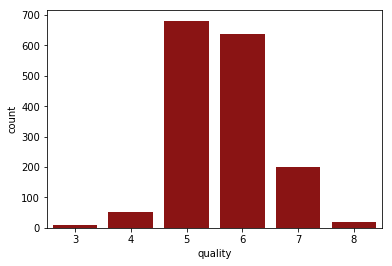

In [8]:
sns.countplot(x=red_wine['quality'], color = dark_red)
plt.show()

**Observation**: There are more wines that are rated 5 and 6. This imbalance issue will become more relevant when we perform classification. 

Text(0.5,1,'Correlation Heatmap for Red Wine')

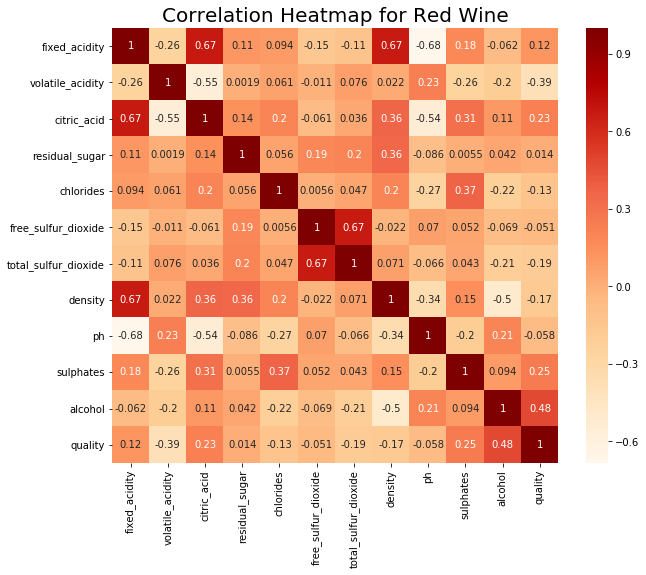

In [9]:
# see correlations of red wine features
red_wine_corr = red_wine.corr()
red_wine_corr = (red_wine_corr)
plt.figure(figsize=(10,8))
sns.heatmap(red_wine_corr, 
            xticklabels = red_wine_corr.columns.values,
            yticklabels = red_wine_corr.columns.values,
            annot=True,
            cmap = 'OrRd')
plt.title('Correlation Heatmap for Red Wine', fontsize = 20)


In [10]:
# display quality correlations in descending order
print('Red Wine Quality Correlations: \n')
# exclude last index because quality correlates 100% with itself
print(red_wine_corr['quality'][:-1].sort_values(ascending = False),'\n')

Red Wine Quality Correlations: 

alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
ph                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64 



**Observation**: Alcohol, sulphates, citric_acid, fixed_acidity, and residual sugars postively correlate with the quality of red wine. Let's now explore those features!

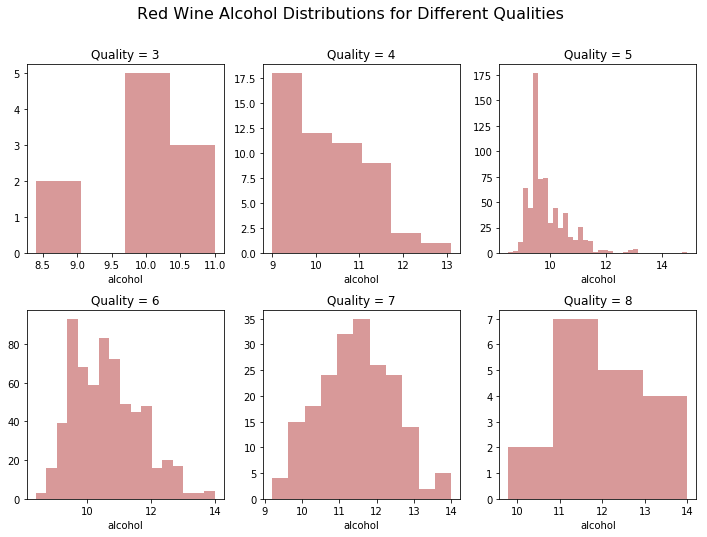

In [11]:
# comparing alcohol content in different quality red wines
red_qual_unique = np.sort(red_wine.quality.unique())
nrows = 2
ncols = 3
figures, axes = plt.subplots(nrows = nrows,ncols = ncols, figsize=(12, 8))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Red Wine Alcohol Distributions for Different Qualities', fontsize=16)

for qual, axis in zip(red_qual_unique, axes):
    sns.distplot(red_wine.alcohol[red_wine.quality == qual], kde = False, color=dark_red, ax=axis).set_title('Quality = {}'.format(str(qual)))


In [12]:
''' Plots a boxplot and swarmplot of two variables. '''
def plot_boxplot(x_name, y_name, dset, figsize, ymin, ymax, swarmplot=False):
    fig, ax = plt.subplots(figsize=figsize)
    fig = sns.boxplot(x = dset[x_name], y = dset[y_name], palette = 'OrRd' )
    if swarmplot is True:
        sns.swarmplot(x = dset[x_name], y = dset[y_name], palette = 'OrRd' )
    plt.suptitle('{} Boxplot Against {}'.format(y_name, x_name), fontsize=16)
    fig.axis(ymin=ymin, ymax=ymax)

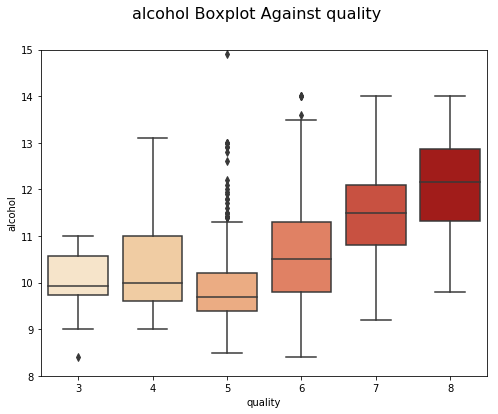

In [13]:
plot_boxplot(x_name='quality', y_name='alcohol', dset=red_wine, figsize=(8,6), ymin=8, ymax=15)

**Observation**: I notice that in higher quality wines, there tends to be a higher alcohol content. I see that there are quite a few outliers in 5 and fewer outliers in 6. It seems to me that the range of alcohol is more varaible in the 'bad' wines. Also, the medians in 7-8 are sizeably greater than the medians of 6 and below, which confirms that there is definitely a positive relationship between alcohol and quality.

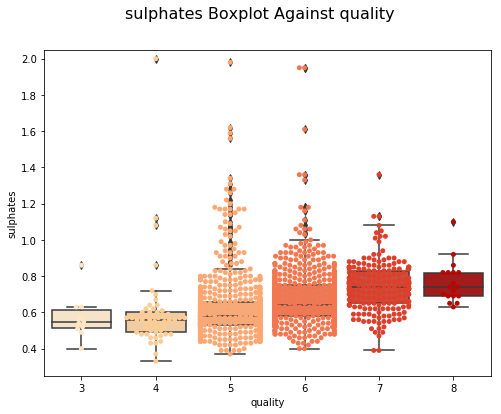

In [14]:
plot_boxplot(x_name='quality', y_name='sulphates', dset=red_wine, figsize=(8,6), ymin=0.25, ymax=2.05, swarmplot=True)

**Observation**: The medians of 7-8 are greater than 5 and below, but not by a lot. However, by looking at the whiskers of the boxplots, the range of sulphates seem to be similar for 'good' and 'bad' quality wines. This is definitely not as strong of an indicator as alcohol, but there is still a positive relationship between sulphates content and quality wines.

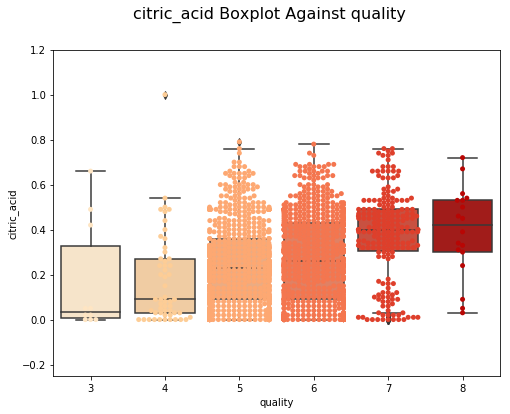

In [15]:
plot_boxplot(x_name='quality', y_name='citric_acid', dset=red_wine, figsize=(8,6), ymin=-0.25, ymax=1.2, swarmplot=True)

**Observation**: There definitely is a positive correlation here with citric acids, but I also see that the range of citric acids seems to be roughly similary for all qualities of wines (0% - 0.8%). Also, we need to consider that there are far fewer samples in 7-8, meaning that as we gather more information, these distributions might start to look more similar. Furthermore, it is also worth noting that despite class imbalance, there is a higher max frequency in 7 than 5 or 6 but also a lower quartile range in 7. Citric acids give wines 'fresh' flavor, and it seems that the wine tasters tend to enjoy wine with higher citric acid content, but it does not mean they cannot enjoy it if it is lower. There is probably some sort of balance with another feature of wine that could case these wine tasters to highly rank low citric acid wine.

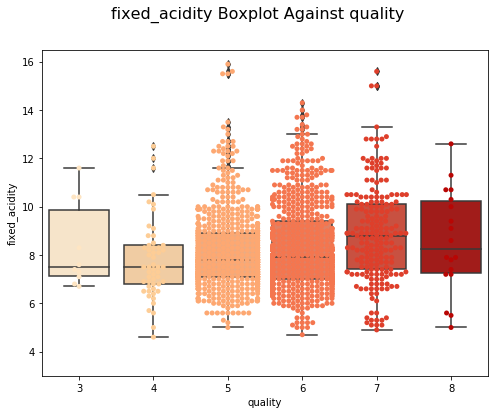

In [16]:
plot_boxplot(x_name='quality', y_name='fixed_acidity', dset=red_wine, figsize=(8,6), ymin=3, ymax=16.5, swarmplot=True)

**Observation**: As we increase in fixed_acidity, the quality of wine tends to be higher. We see the quartile ranges increase from 4-7. It is interesting to look at 8, because despite having not many samples, we see a noticeable spread in the distribution. Again, this might be that more fixed_acidity content does not necessarily equate to a good wine.

# Next Section: [Data Processing and Model Tuning](2.red-wine-processing-and-model-tuning.ipynb)